I am following the code at
https://www.datanovia.com/en/lessons/mixed-anova-in-r/#three-way-bww-b

to learn about three-way mixed repeated measures ANOVA with 1 between subject factor and 2 within subject factors

In [ ]:
library(tidyverse)
library(ggpubr)
library(rstatix)

'data.frame':	22 obs. of  2 variables:
 $ Filenames: chr  "ElbowHand_AngularVariance.csv" "Grasp_HandVelocity.csv" "Release_HandVelocity.csv" "Hand_Area.csv" ...
 $ Varnames : chr  "AngularVariance" "HandVelocity" "HandVelocity" "Area" ...


In [45]:
varname = "percent"
filename = "dataT.csv"
print(filename)
r_data = read.csv(filename)
#print(r_data)
data = as_tibble(r_data)
#print(data)

[1] "dataT.csv"


In [46]:
head(data,3)

Animal,BrakeState,EventType,Exc,Inh
<int>,<int>,<int>,<dbl>,<dbl>
1,1,1,6.135987,2.072968
1,1,2,2.404643,3.316750
1,1,3,2.321725,1.409619


In [47]:
data <- data %>%
  gather(key = "CellType", value = "percent", Exc, Inh) %>%
  convert_as_factor(Animal,BrakeState,EventType,CellType)
print(data)

# A tibble: 60 x 5
   Animal BrakeState EventType CellType percent
   <fct>  <fct>      <fct>     <fct>      <dbl>
 1 1      1          1         Exc         6.14
 2 1      1          2         Exc         2.40
 3 1      1          3         Exc         2.32
 4 1      2          1         Exc        11.4 
 5 1      2          2         Exc         8.51
 6 1      2          3         Exc         1.71
 7 2      1          1         Exc         5.90
 8 2      1          2         Exc         1.23
 9 2      1          3         Exc         1.85
10 2      2          1         Exc         4.99
# ... with 50 more rows


In [ ]:
ls()

In [59]:
print(varname)
data %>%
  group_by(Animal,BrakeState,EventType,CellType) %>%
  get_summary_stats(percent,type = "mean_sd")

[1] "percent"


Animal,BrakeState,EventType,CellType,variable,n,mean,sd
<fct>,<fct>,<fct>,<fct>,<chr>,<dbl>,<dbl>,<dbl>
1,1,1,Exc,percent,1,6.136,NA
1,1,1,Inh,percent,1,2.073,NA
1,1,2,Exc,percent,1,2.405,NA
1,1,2,Inh,percent,1,3.317,NA
1,1,3,Exc,percent,1,2.322,NA
1,1,3,Inh,percent,1,1.410,NA
1,2,1,Exc,percent,1,11.443,NA
1,2,1,Inh,percent,1,4.312,NA
1,2,2,Exc,percent,1,8.513,NA


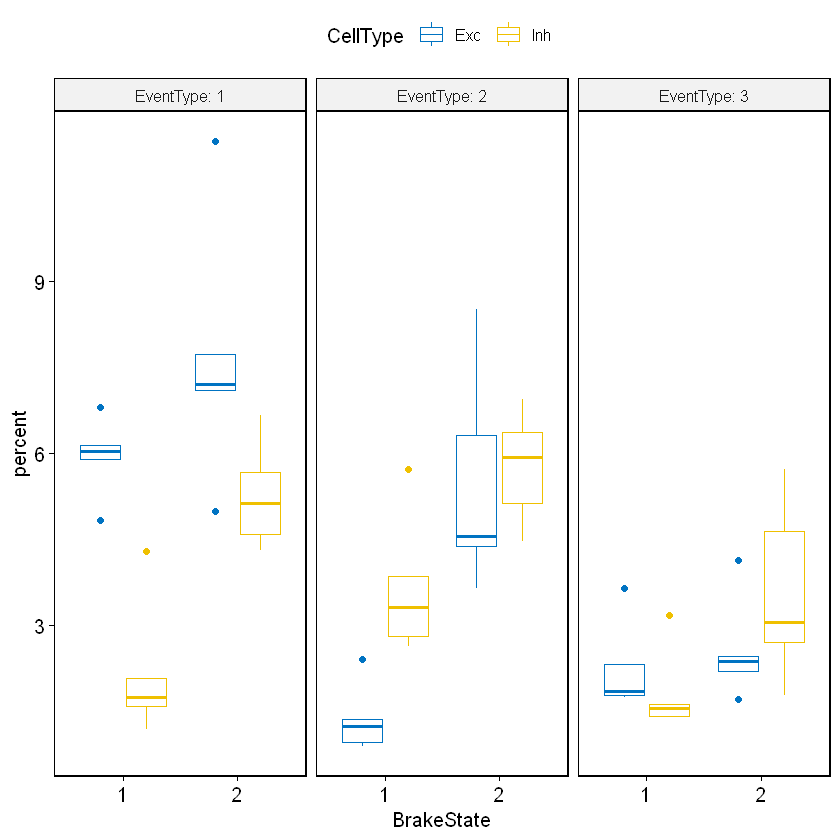

In [49]:
bxp <- ggboxplot(
  data, x = "BrakeState", y = "percent",
  color = "CellType", palette = "jco",
  facet.by = "EventType", short.panel.labs = FALSE
  )
bxp

In [51]:
data %>%
  group_by(EventType, BrakeState, CellType) %>%
  identify_outliers(percent)

BrakeState,EventType,CellType,Animal,percent,is.outlier,is.extreme
<fct>,<fct>,<fct>,<fct>,<dbl>,<lgl>,<lgl>
1,1,Exc,4,6.804734,TRUE,FALSE
1,1,Exc,5,4.826255,TRUE,TRUE
1,1,Inh,3,4.285714,TRUE,TRUE
2,1,Exc,1,11.442786,TRUE,TRUE
2,1,Exc,2,4.988263,TRUE,TRUE
1,2,Exc,1,2.404643,TRUE,FALSE
1,2,Inh,3,5.714286,TRUE,FALSE
1,3,Exc,3,3.650794,TRUE,FALSE
1,3,Inh,3,3.174603,TRUE,TRUE


In [52]:
data %>%
  group_by(EventType, BrakeState, CellType) %>%
  shapiro_test(percent)

BrakeState,EventType,CellType,variable,statistic,p
<fct>,<fct>,<fct>,<chr>,<dbl>,<dbl>
1,1,Exc,percent,0.9247867,0.561276833
1,1,Inh,percent,0.7933926,0.071506623
2,1,Exc,percent,0.8977673,0.397668861
2,1,Inh,percent,0.9476161,0.720151437
1,2,Exc,percent,0.8151564,0.107076966
1,2,Inh,percent,0.8590299,0.224786264
2,2,Exc,percent,0.8943421,0.379408605
2,2,Inh,percent,0.9792470,0.930550246
1,3,Exc,percent,0.7533038,0.031926123


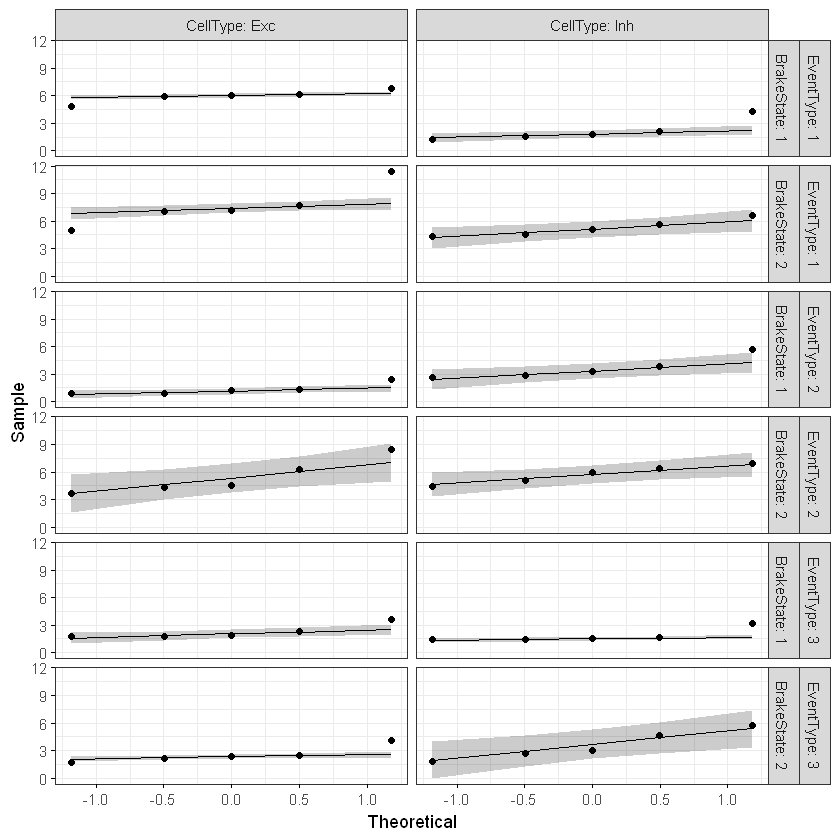

In [55]:
ggqqplot(data, "percent", ggtheme = theme_bw()) +
  facet_grid(EventType + BrakeState ~ CellType, labeller = "label_both")

In [57]:
data %>%
  group_by(EventType, CellType) %>%
  levene_test(percent ~ BrakeState)

EventType,CellType,df1,df2,statistic,p
<fct>,<fct>,<int>,<int>,<dbl>,<dbl>
1,Exc,1,8,1.330196851,0.2820625
1,Inh,1,8,0.003228514,0.9560821
2,Exc,1,8,1.704509316,0.2279917
2,Inh,1,8,0.028490493,0.8701504
3,Exc,1,8,0.009647151,0.9241740
3,Inh,1,8,1.914237292,0.2038719


In [58]:
res.aov <- anova_test(
  data = data, dv = percent, wid = Animal,
  within = c(BrakeState,EventType, CellType)
  )
get_anova_table(res.aov)

,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,BrakeState,1,4,130.121,3.37e-04,*,0.476
2,EventType,2,8,19.216,8.81e-04,*,0.483
3,CellType,1,4,0.959,3.83e-01,,0.046
4,BrakeState:EventType,2,8,4.552,4.80e-02,*,0.125
5,BrakeState:CellType,1,4,0.175,6.97e-01,,0.003
6,EventType:CellType,2,8,42.335,5.55e-05,*,0.402
7,BrakeState:EventType:CellType,2,8,6.727,1.90e-02,*,0.110


In [61]:
# Two-way ANOVA at each diet level
two.way <- data %>%
  group_by(BrakeState) %>%
  anova_test(dv = percent, wid = Animal, within = c(EventType, CellType))
get_anova_table(two.way)

BrakeState,Effect,DFn,DFd,F,p,p<.05,ges
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,EventType,2,8,49.832,3.05e-05,*,0.517
1,CellType,1,4,2.283,2.05e-01,,0.127
1,EventType:CellType,2,8,51.367,2.72e-05,*,0.692
2,EventType,2,8,10.718,5.00e-03,*,0.519
2,CellType,1,4,0.263,6.35e-01,,0.018
2,EventType:CellType,2,8,9.137,9.00e-03,*,0.219


In [64]:
# Effect of time at each diet X exercises cells
CellType.effect <- data %>%
  group_by(BrakeState, EventType) %>%
  anova_test(dv = percent, wid = Animal, within = CellType)
get_anova_table(CellType.effect)

,BrakeState,EventType,Effect,DFn,DFd,F,p,p<.05,ges
,<fct>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,1,1,CellType,1,4,33.903,0.004,*,0.815
2,1,2,CellType,1,4,11.829,0.026,*,0.635
3,1,3,CellType,1,4,10.168,0.033,*,0.088
4,2,1,CellType,1,4,4.043,0.115,,0.365
5,2,2,CellType,1,4,0.111,0.756,,0.011
6,2,3,CellType,1,4,6.853,0.059,,0.159


In [68]:
# Pairwise comparisons
pwc <- data %>%
  group_by(BrakeState, EventType) %>%
  pairwise_t_test(percent ~ CellType, paired = TRUE, p.adjust.method = "bonferroni") %>%
  select(-df, -statistic) # Remove details
# Show comparison results for "diet:no,exercises:yes" groups
pwc %>% filter(BrakeState == 1, EventType == 1) %>%
  select(-p)     # remove p columns
pwc %>% filter(BrakeState == 1, EventType == 2) %>%
  select(-p)     # remove p columns
pwc %>% filter(BrakeState == 1, EventType == 3) %>%
  select(-p)     # remove p columns

BrakeState,EventType,.y.,group1,group2,n1,n2,p.adj,p.adj.signif
<fct>,<fct>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>
1,1,percent,Exc,Inh,5,5,0.004,**


BrakeState,EventType,.y.,group1,group2,n1,n2,p.adj,p.adj.signif
<fct>,<fct>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>
1,2,percent,Exc,Inh,5,5,0.026,*


BrakeState,EventType,.y.,group1,group2,n1,n2,p.adj,p.adj.signif
<fct>,<fct>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>
1,3,percent,Exc,Inh,5,5,0.033,*


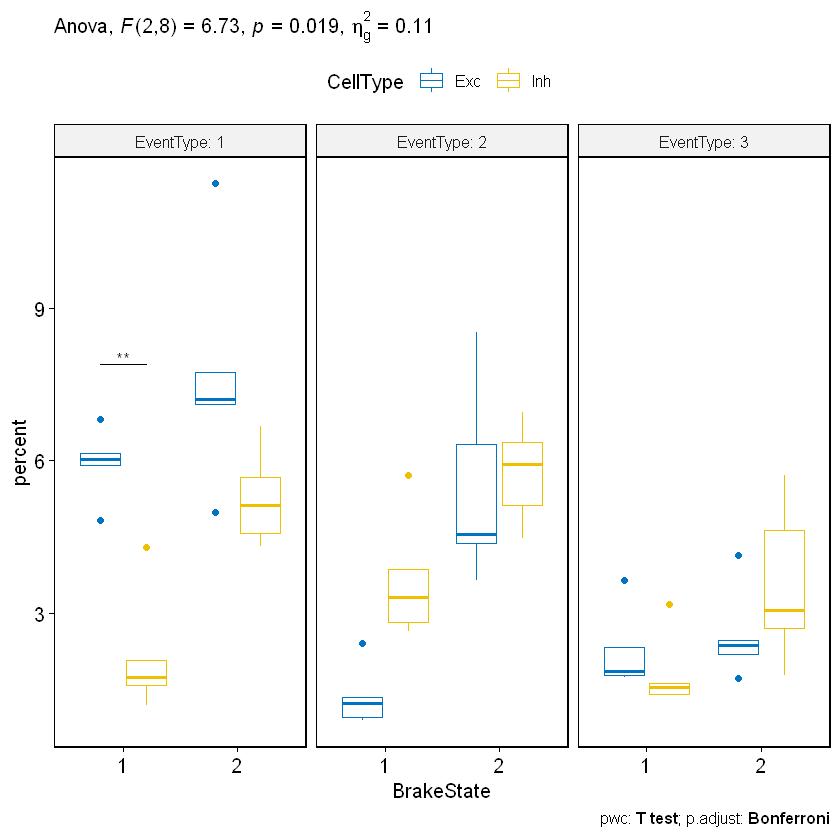

In [69]:
# Visualization: box plots with p-values
pwc <- pwc %>% add_xy_position(x = "EventType")
pwc.filtered <- pwc %>% 
  filter(BrakeState == 1, EventType == 1)
bxp + 
  stat_pvalue_manual(pwc.filtered, tip.length = 0, hide.ns = TRUE) +
  labs(
    subtitle = get_test_label(res.aov, detailed = TRUE),
    caption = get_pwc_label(pwc)
  )

In [ ]:
# file_names <- data.frame(data_file_names_df$Filenames)
# for (ii in seq(1,nrow(data_file_names_df),by=1)){
#     filename = as.vector(data_file_names_df$Filenames[ii])
#     data = read.csv(filename)
#     print(data)
#     }